In [33]:
%load_ext autoreload 
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import pyro
import pyro.distributions as dist
from pyro import infer, poutine
from pyro.infer import HMC, MCMC, NUTS
plt.style.use("seaborn-v0_8")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


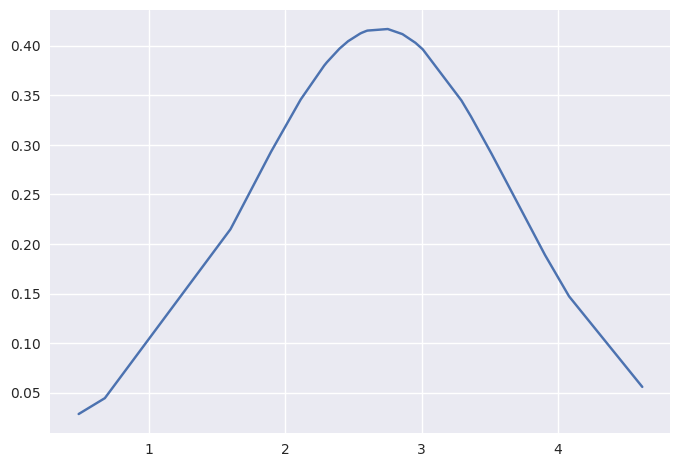

In [34]:
pyro.clear_param_store()
pyro.set_rng_seed(0)
N = 25
μ =  torch.tensor(2.7)
𝝈 =  torch.tensor(0.956)
y = dist.Normal(μ, 𝝈).sample((N, ))
z = (dist.Normal(μ, 𝝈).log_prob(y).exp())
plt.plot(y.sort().values, z.take(y.argsort()))

In [35]:
def model(data):
    mu = pyro.sample("mu", dist.Normal(-60, 10))
    sigma = pyro.sample("sigma", dist.LogNormal(0, 2))
    with pyro.plate("data", N):
        obs = pyro.sample("obs", dist.Normal(mu, sigma), obs=data)
    return obs

In [36]:
pyro.clear_param_store()
pyro.set_rng_seed(12560)
hmc_kernel = HMC(model, step_size=1, num_steps=10)
def hook_mcmc(kernel:HMC, samples, stage, i):
    print("kernel params ", kernel._initial_params, stage)
    
mcmc = MCMC(kernel=hmc_kernel, num_samples=20, warmup_steps=10,
            hook_fn=hook_mcmc
            )
print("running mcmc")
mcmc.run(y)

running mcmc


Warmup:   0%|          | 0/30 [00:00, ?it/s]

Warmup:   3%|▎         | 1/30 [00:00,  1.51it/s, step size=2.25e-01, acc. prob=1.000]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Warmup
kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Warmup


Warmup:  10%|█         | 3/30 [00:00,  3.57it/s, step size=3.75e-03, acc. prob=0.333]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Warmup


Warmup:  13%|█▎        | 4/30 [00:03,  1.03s/it, step size=5.07e-03, acc. prob=0.500]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Warmup


Warmup:  17%|█▋        | 5/30 [00:05,  1.30s/it, step size=7.93e-03, acc. prob=0.600]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Warmup


Warmup:  20%|██        | 6/30 [00:06,  1.25s/it, step size=1.35e-02, acc. prob=0.667]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Warmup


Warmup:  23%|██▎       | 7/30 [00:07,  1.07s/it, step size=2.41e-02, acc. prob=0.714]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Warmup


Warmup:  27%|██▋       | 8/30 [00:07,  1.17it/s, step size=4.45e-02, acc. prob=0.750]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Warmup


Warmup:  30%|███       | 9/30 [00:07,  1.52it/s, step size=2.37e-02, acc. prob=0.778]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Warmup


Warmup:  33%|███▎      | 10/30 [00:08,  1.75it/s, step size=2.37e-02, acc. prob=0.800]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Warmup


Warmup:  37%|███▋      | 11/30 [00:08,  1.94it/s, step size=2.37e-02, acc. prob=1.000]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  40%|████      | 12/30 [00:08,  2.10it/s, step size=2.37e-02, acc. prob=1.000]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  43%|████▎     | 13/30 [00:09,  2.22it/s, step size=2.37e-02, acc. prob=0.999]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  47%|████▋     | 14/30 [00:09,  2.31it/s, step size=2.37e-02, acc. prob=0.999]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  50%|█████     | 15/30 [00:09,  2.38it/s, step size=2.37e-02, acc. prob=1.000]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  53%|█████▎    | 16/30 [00:10,  2.45it/s, step size=2.37e-02, acc. prob=0.990]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  57%|█████▋    | 17/30 [00:10,  2.49it/s, step size=2.37e-02, acc. prob=0.991]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  60%|██████    | 18/30 [00:11,  2.52it/s, step size=2.37e-02, acc. prob=0.992]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  63%|██████▎   | 19/30 [00:11,  2.55it/s, step size=2.37e-02, acc. prob=0.993]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  67%|██████▋   | 20/30 [00:11,  2.54it/s, step size=2.37e-02, acc. prob=0.994]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  70%|███████   | 21/30 [00:12,  2.55it/s, step size=2.37e-02, acc. prob=0.994]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  73%|███████▎  | 22/30 [00:12,  2.57it/s, step size=2.37e-02, acc. prob=0.995]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  77%|███████▋  | 23/30 [00:13,  2.57it/s, step size=2.37e-02, acc. prob=0.995]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  80%|████████  | 24/30 [00:13,  2.58it/s, step size=2.37e-02, acc. prob=0.995]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  83%|████████▎ | 25/30 [00:13,  2.59it/s, step size=2.37e-02, acc. prob=0.995]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  87%|████████▋ | 26/30 [00:14,  2.59it/s, step size=2.37e-02, acc. prob=0.996]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  90%|█████████ | 27/30 [00:14,  2.60it/s, step size=2.37e-02, acc. prob=0.996]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  93%|█████████▎| 28/30 [00:15,  2.58it/s, step size=2.37e-02, acc. prob=0.996]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample:  97%|█████████▋| 29/30 [00:15,  2.61it/s, step size=2.37e-02, acc. prob=0.996]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


Sample: 100%|██████████| 30/30 [00:15,  1.90it/s, step size=2.37e-02, acc. prob=0.997]

kernel params  {'mu': tensor(-0.4587), 'sigma': tensor(-1.5960)} Sample


In [37]:
mcmc.get_samples()

{'mu': tensor([13.9724,  6.4049,  0.5061,  0.9401,  1.0479,  3.2247,  2.8633,  2.9290,
          3.0050,  2.7520,  2.6046,  2.9821,  2.9425,  2.5816,  2.7564,  2.5075,
          2.5162,  2.8366,  2.7638,  2.6294]),
 'sigma': tensor([161.7101,   4.7666,   2.5700,   2.8469,   1.9602,   0.6741,   1.1793,
           1.1456,   0.9810,   1.1077,   1.1570,   1.0095,   1.1479,   1.1936,
           1.1872,   1.1498,   1.1686,   1.1099,   0.9949,   0.9834])}

In [38]:
mcmc.kernel.initial_params

In [39]:
dist.Normal(-0.4587, .2027).log_prob(y).sum()

tensor(-3175.8696)

In [40]:
mcmc.get_samples()["mu"].mean()

tensor(3.2383)

In [41]:
mcmc.get_samples()['sigma'].mean()

tensor(9.5022)

In [42]:
mcmc.kernel.inverse_mass_matrix

{('mu', 'sigma'): tensor([1., 1.])}

In [46]:
pyro.clear_param_store()
pyro.set_rng_seed(12560)
hmc_kernel = HMC(model,)
    
mcmc = MCMC(kernel=hmc_kernel, num_samples=20, warmup_steps=100)
print("running mcmc")
mcmc.run(y)

running mcmc


Warmup:   0%|          | 0/120 [00:00, ?it/s]

Sample: 100%|██████████| 120/120 [00:16,  7.12it/s, step size=3.95e-01, acc. prob=0.921]


In [47]:
mcmc.get_samples()["mu"].mean()

tensor(2.6052)

In [48]:
mcmc.get_samples()["sigma"].mean()

tensor(1.0284)

In [52]:
pyro.clear_param_store()
pyro.set_rng_seed(12560)
hmc_kernel = HMC(model, step_size=0.1, num_steps=5)
mcmc = MCMC(kernel=hmc_kernel, num_samples=20, warmup_steps=1000)
print("running mcmc")
mcmc.run(y)

running mcmc


Warmup:   0%|          | 0/1020 [00:00, ?it/s]

Sample: 100%|██████████| 1020/1020 [00:01, 562.87it/s, step size=9.97e-01, acc. prob=0.919]


In [53]:
mcmc.get_samples()["mu"].mean()

tensor(2.6008)

In [54]:
mcmc.get_samples()["sigma"].mean()

tensor(0.9805)

In [55]:
mcmc.summary(prob=0.5)


                mean       std    median     25.0%     75.0%     n_eff     r_hat
        mu      2.60      0.22      2.58      2.50      2.77      3.91      1.84
     sigma      0.98      0.15      0.96      0.85      0.98      7.51      1.40

Number of divergences: 0
